In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_excel('healthcare_dataset.xlsx')
df

,Patient_ID,Age,Gender,City,Department,Visit_Date,Diagnosis,Treatment_Cost,Follow_Up,Satisfaction_Score
0,1,69,Female,Phoenix,General Medicine,2023-03-04,Flu,13093.75,No,10
1,2,32,Male,Phoenix,Pediatrics,2021-03-20,Diabetes,11131.79,No,5
2,3,89,Female,Houston,General Medicine,2023-07-26,Migraine,1822.61,No,9
3,4,78,Female,Houston,Cardiology,2022-12-08,Migraine,17714.34,No,5
4,5,38,Female,Los Angeles,Pediatrics,2021-10-16,Hypertension,10400.34,Yes,3
...,...,...,...,...,...,...,...,...,...,...
14995,14996,71,Male,Houston,General Medicine,2022-11-19,Fracture,9244.55,Yes,8
14996,14997,32,Female,Chicago,Orthopedics,2022-02-22,Diabetes,16254.03,No,3
14997,14998,67,Male,New York,General Medicine,2021-10-23,Migraine,5294.03,No,7
14998,14999,73,Male,New York,Cardiology,2022-06-01,Diabetes,16262.64,No,10


In [4]:
unique_patient_count = df['Patient_ID'].nunique()
print("Unique Patient Count:", unique_patient_count)

Unique Patient Count: 15000


In [5]:
avg_age = df['Age'].mean()
print('Average Age: ', avg_age.round(2))

Average Age:  53.45


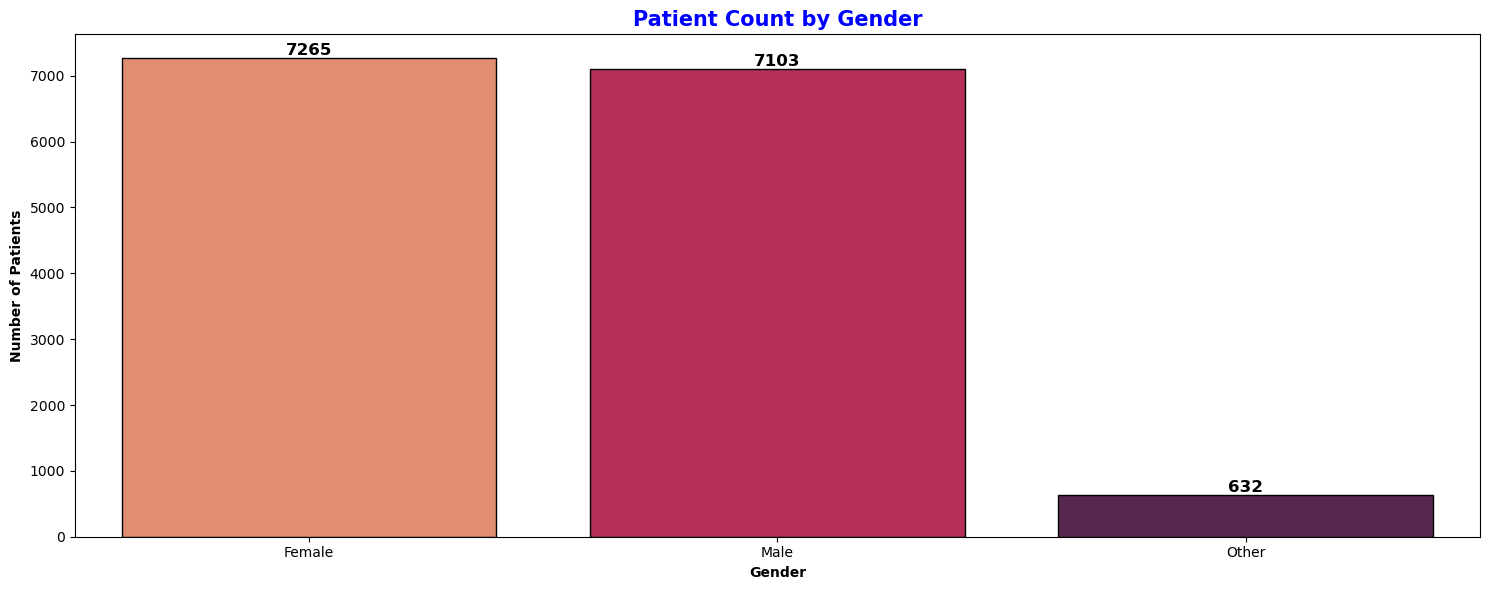

In [6]:
gender_count=df.groupby('Gender')['Patient_ID'].count().reset_index()

plt.figure(figsize=(15,6))
ax = sns.barplot(
    data=gender_count,
    x='Gender',
    y='Patient_ID',
    palette='rocket_r',
    edgecolor='black'
)
plt.title("Patient Count by Gender", fontsize=15, fontweight="bold", color='b')
plt.xlabel("Gender", fontweight='bold')
plt.ylabel("Number of Patients", fontweight='bold')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

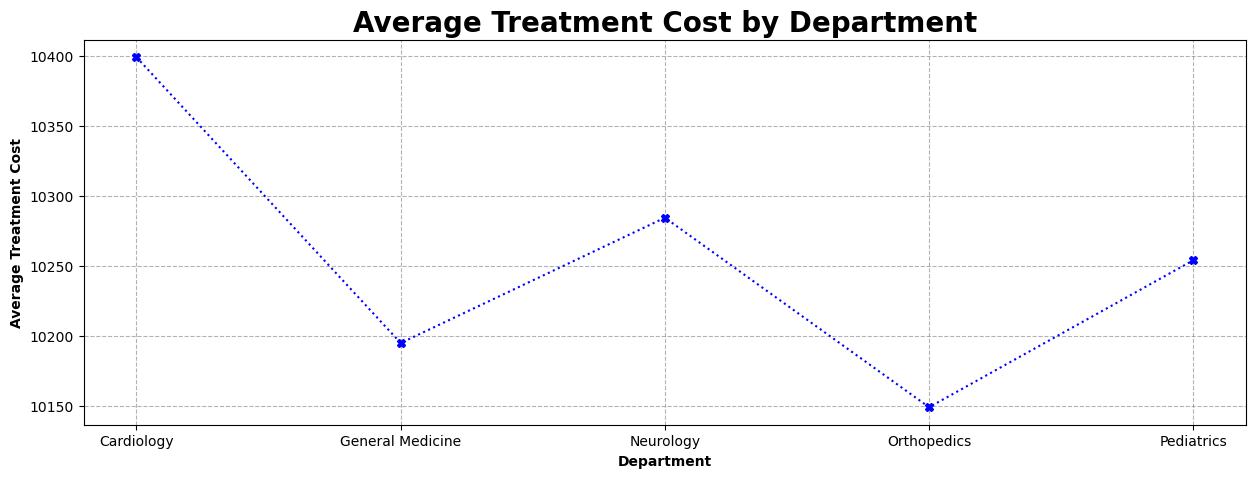

In [7]:
avg_treatment_cost = df.groupby('Department')['Treatment_Cost'].mean().round(2).reset_index()
plt.figure(figsize=(15,5))
plt.plot(
    avg_treatment_cost['Department'],
    avg_treatment_cost['Treatment_Cost'],
    marker='X',
    linestyle=':',
    color='blue'
)
plt.title("Average Treatment Cost by Department", fontweight="bold", fontsize=20)
plt.xlabel('Department', fontweight="bold")
plt.ylabel('Average Treatment Cost', fontweight="bold")
plt.grid(ls="--", color='gray', alpha=0.6)
plt.xticks(rotation=360)
plt.show()

In [8]:
diagnosis_satisfaction=df.groupby('Diagnosis').agg(
    minimum_rating=('Satisfaction_Score','min'),
    maximum_rating=('Satisfaction_Score','max')
)
diagnosis_satisfaction

,minimum_rating,maximum_rating
Diagnosis,,
Diabetes,1,10
Flu,1,10
Fracture,1,10
Hypertension,1,10
Migraine,1,10


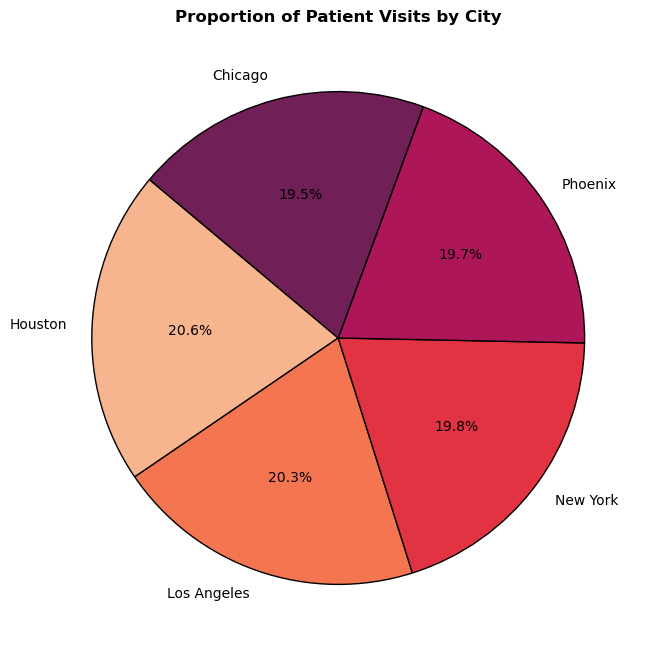

In [9]:
patient_count_city = df.groupby('City')['Patient_ID'].count().reset_index()
patient_count_city = patient_count_city.sort_values(by='Patient_ID', ascending=False)
plt.figure(figsize=(8,8))
plt.pie(
    patient_count_city['Patient_ID'],
    labels=patient_count_city['City'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('rocket_r'),
    wedgeprops={'edgecolor':'black'}
)
plt.title('Proportion of Patient Visits by City', fontweight='bold')
plt.show()

In [10]:
followup_dist = df['Follow_Up'].value_counts(normalize = True) * 100
followup_dist.round(2).to_frame(name = 'Follow up Stats Distribution')

,Follow up Stats Distribution
Follow_Up,
No,70.01
Yes,29.99


In [11]:
top_department = df['Department'].value_counts()
top_department.to_frame(name = 'City with Highest number of visits')

,City with Highest number of visits
Department,
Orthopedics,3021
Cardiology,3015
Pediatrics,3015
General Medicine,3000
Neurology,2949


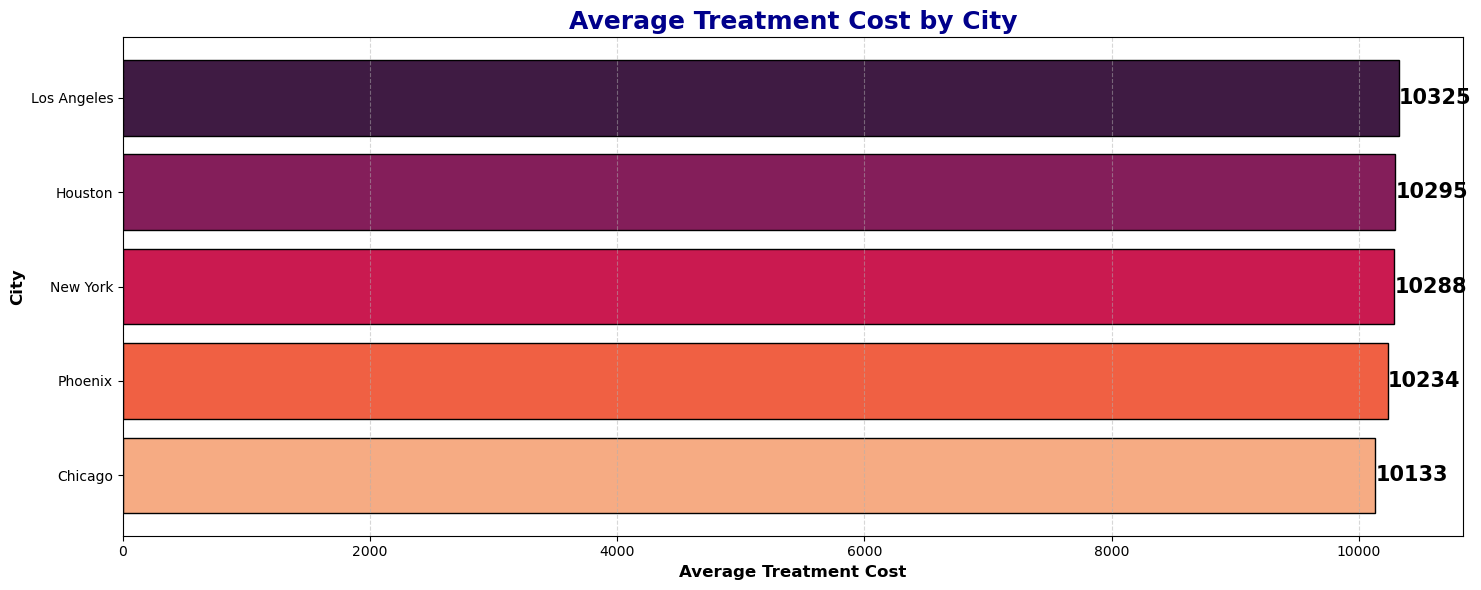

In [12]:
avg_city = df.groupby('City')['Treatment_Cost'].mean().round(2).reset_index()
avg_city = avg_city.sort_values(by='Treatment_Cost', ascending=True)
colors = sns.color_palette("rocket_r", len(avg_city))
plt.figure(figsize=(15,6))
ax = plt.barh(avg_city['City'], avg_city['Treatment_Cost'], color=colors, edgecolor='black')
plt.title("Average Treatment Cost by City", fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel("Average Treatment Cost", fontsize=12, fontweight='bold')
plt.ylabel("City", fontsize=12, fontweight='bold')
for index, value in enumerate(avg_city['Treatment_Cost']):
    plt.text(value + 0.5, index, f'{value:.0f}', va='center', fontsize=15, fontweight='bold', color='black')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [13]:
covarience = df['Age'].cov(df['Treatment_Cost'])
age = df['Age'].std()
cost = df['Treatment_Cost'].std()
correlation = round(covarience / (age * cost),5)
print('The Correlation Between age and Treatment', correlation)

The Correlation Between age and Treatment 0.00188


In [14]:
satisfactory_score = df[(df['Patient_ID']) & (df['Satisfaction_Score'] > 8)]
satisfactory_score

,Patient_ID,Age,Gender,City,Department,Visit_Date,Diagnosis,Treatment_Cost,Follow_Up,Satisfaction_Score
0,1,69,Female,Phoenix,General Medicine,2023-03-04,Flu,13093.75,No,10
2,3,89,Female,Houston,General Medicine,2023-07-26,Migraine,1822.61,No,9
12,13,19,Male,Houston,Cardiology,2023-12-08,Fracture,17171.80,No,10
20,21,76,Female,Houston,Neurology,2023-09-15,Fracture,10739.87,No,9
30,31,81,Female,New York,Neurology,2022-05-25,Diabetes,19082.86,No,10
...,...,...,...,...,...,...,...,...,...,...
14984,14985,63,Other,New York,Orthopedics,2023-06-19,Diabetes,11647.18,No,9
14986,14987,34,Male,Chicago,General Medicine,2023-08-16,Diabetes,9355.34,No,9
14990,14991,33,Male,Phoenix,Pediatrics,2023-05-13,Diabetes,10586.51,No,10
14992,14993,25,Male,Phoenix,Orthopedics,2023-08-21,Flu,547.58,Yes,9


In [15]:
avg_cost_followup = round(df[df['Follow_Up'] == 'Yes']['Treatment_Cost'].mean(),2)
print(f"Average Treatment Cost for Follow-up Patients: ₹",avg_cost_followup)

Average Treatment Cost for Follow-up Patients: ₹ 10231.88


In [37]:
diagnosis_distribution=round((df.groupby('Department')['Diagnosis'].count()
                              /len(df['Diagnosis'])*100),2).reset_index()
diagnosis_distribution.columns=['Diagnosis Types','distribution (%)']
diagnosis_distribution

,Diagnosis Types,distribution (%)
0,Cardiology,20.10
1,General Medicine,20.00
2,Neurology,19.66
3,Orthopedics,20.14
4,Pediatrics,20.10


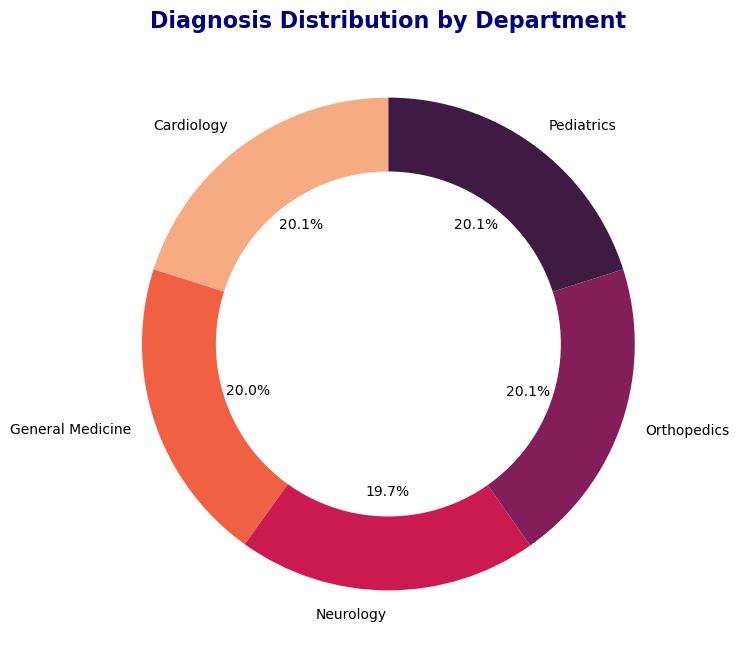

In [36]:
diagnosis_distribution = (
    df.groupby('Department')['Diagnosis'].count()
    /(len(df['Diagnosis']))*(100)).reset_index()
diagnosis_distribution.columns = ['Department', 'Distribution (%)']
plt.figure(figsize=(8,8))
plt.pie(
    diagnosis_distribution['Distribution (%)'],
    labels=diagnosis_distribution['Department'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('rocket_r', len(diagnosis_distribution))
)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Diagnosis Distribution by Department", fontsize=16, fontweight='bold', color='navy')
plt.show()

In [18]:
top_expensive = df.sort_values(by='Treatment_Cost', ascending = False).head(5)
top_expensive

,Patient_ID,Age,Gender,City,Department,Visit_Date,Diagnosis,Treatment_Cost,Follow_Up,Satisfaction_Score
11248,11249,56,Female,Houston,General Medicine,2023-04-07,Hypertension,19999.84,No,4
252,253,71,Female,Chicago,Pediatrics,2021-09-15,Fracture,19997.41,No,5
4201,4202,66,Male,Los Angeles,Cardiology,2022-11-25,Fracture,19997.24,No,2
11447,11448,56,Female,New York,Neurology,2023-04-19,Hypertension,19996.02,Yes,3
8855,8856,20,Other,Phoenix,General Medicine,2021-10-25,Migraine,19995.21,No,3


In [19]:
df['VisitYear'] = pd.to_datetime(df['Visit_Date']).dt.year

In [20]:
visits_per_year = df['VisitYear'].value_counts().sort_index()
visits_per_year.to_frame(name = 'Visits per year')

,Visits per year
VisitYear,
2021,5040
2022,4996
2023,4964


In [21]:
median_cost = df.groupby(['Gender', 'Diagnosis'])['Treatment_Cost'].median().round(2)
median_cost.to_frame()

Treatment_Cost
Gender Diagnosis                   
Female Diabetes            10464.96
       Flu                 10242.07
       Fracture            10158.67
       Hypertension        10477.50
       Migraine            10615.41
Male   Diabetes            10547.70
       Flu                 10259.16
       Fracture             9794.63
       Hypertension        10297.16
       Migraine            10388.09
Other  Diabetes            11221.41
       Flu                 10389.82
       Fracture            11716.16
       Hypertension        11210.66
       Migraine             9639.09

In [22]:
df['CostCategory'] = df['Treatment_Cost'].apply(lambda x: 'High' if x > 10000 else 'Low')

In [23]:
cardiology_percentage = round((len(df[df['Department'] == 'Cardiology'])
                               / len(df)) * 100, 2)
print(f"Percentage of patients from Cardiology: {cardiology_percentage}%")

Percentage of patients from Cardiology: 20.1%


In [24]:
department_scores = df.groupby('Department')['Satisfaction_Score'].mean()
lowest_3_departments = department_scores.nsmallest(3)
lowest_3_departments.to_frame().round(2)

,Satisfaction_Score
Department,
Orthopedics,5.41
General Medicine,5.44
Cardiology,5.51


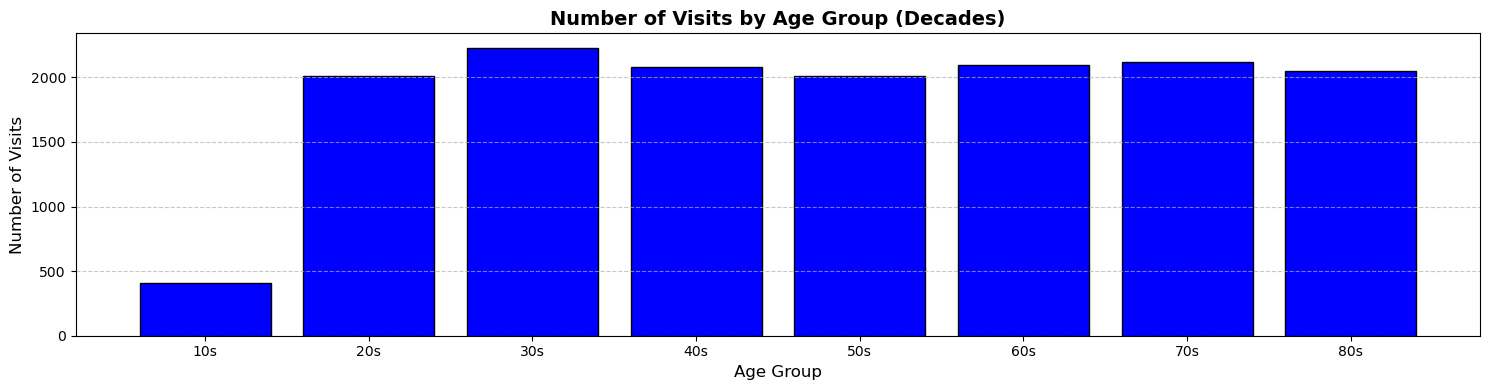

In [25]:
df['Age_Group'] = ((df['Age'] // 10) * 10).astype(str) + 's'
age_visits = df.groupby('Age_Group')['Patient_ID'].count()
age_visits.sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,4))
plt.bar(age_visits.index, age_visits.values, color='blue', edgecolor='black')
plt.title('Number of Visits by Age Group (Decades)', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(rotation=360)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
gender_scores = df.groupby('Gender')['Satisfaction_Score'].mean()
top_gender = gender_scores.idxmax()
top_score = round(gender_scores,2).max()
data = pd.DataFrame({
    'Metric':['Gender','max-score'],
    'mean':[top_gender,top_score]
})
data

,Metric,mean
0,Gender,Male
1,max-score,5.51


In [27]:
patients_2023 = df[df['VisitYear'] == 2023]['Patient_ID'].nunique()
print('Patients counts visited in the year 2023: ',patients_2023)

Patients counts visited in the year 2023:  4964


In [28]:
pivot = df.pivot_table(values='Treatment_Cost', index='Gender', columns='Department', aggfunc='mean')
pivot.round(2)

Department,Cardiology,General Medicine,Neurology,Orthopedics,Pediatrics
Gender,,,,,
Female,10455.94,10101.14,10464.19,10198.77,10362.23
Male,10308.40,10276.82,10107.23,10048.13,10137.19
Other,10776.15,10299.17,10179.67,10740.77,10290.51
